In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from ClusteringGroundTruth import cluster_gt, cluster_gt_solver
from Env import ClusteringEnvNumpy
from Plotter import PlotClustering
np.random.seed(42)

In [16]:
from TestCaseGenerator import data_RLClustering

X, M, T_P, N, d = data_RLClustering(4)

beta_min = 0.1
beta_max = 10000.0
tau = 1.1
eps = 0.99
gamma = 0.5
zeta = 1.0
T = 0.01
parametrized = True
rho = np.ones(N) / N  # Uniform weights
Y = np.mean(X, axis=0) + np.random.randn(M, 2) * 0.001



env = ClusteringEnvNumpy(
    n_data=N,
    n_clusters=M,
    n_features=d,
    parametrized=parametrized,
    eps=eps,
    gamma=gamma,
    zeta=zeta,
    T=T,
    T_p=T_P,
)

In [19]:
Y, pi, Y_list, pi_list, Betas = cluster_gt(
    X, Y, rho, env, beta_min=beta_min, beta_max=beta_max, tau=tau, verbose=True
)

beta: 0.10, distortion: 0.1489
beta: 0.11, distortion: 0.1488
beta: 0.12, distortion: 0.1488
beta: 0.13, distortion: 0.1487
beta: 0.15, distortion: 0.1487
beta: 0.16, distortion: 0.1486
beta: 0.18, distortion: 0.1485
beta: 0.19, distortion: 0.1484
beta: 0.21, distortion: 0.1483
beta: 0.24, distortion: 0.1482
beta: 0.26, distortion: 0.1481
beta: 0.29, distortion: 0.1479
beta: 0.31, distortion: 0.1478
beta: 0.35, distortion: 0.1476
beta: 0.38, distortion: 0.1474
beta: 0.42, distortion: 0.1472
beta: 0.46, distortion: 0.1469
beta: 0.51, distortion: 0.1467
beta: 0.56, distortion: 0.1464
beta: 0.61, distortion: 0.1461
beta: 0.67, distortion: 0.1457
beta: 0.74, distortion: 0.1453
beta: 0.81, distortion: 0.1448
beta: 0.90, distortion: 0.1443
beta: 0.98, distortion: 0.1437
beta: 1.08, distortion: 0.1430
beta: 1.19, distortion: 0.1422
beta: 1.31, distortion: 0.1413
beta: 1.44, distortion: 0.1403
beta: 1.59, distortion: 0.1391
beta: 1.74, distortion: 0.1377
beta: 1.92, distortion: 0.1362
beta: 2.

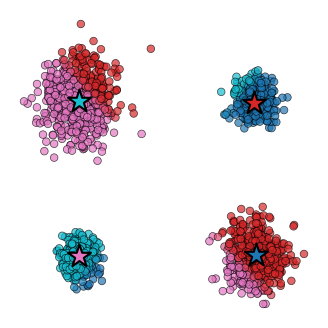

In [20]:

PlotClustering(X, Y, pi, figsize=(6, 4), save_path=None)

In [11]:
# create a scenario name that reflects all the parameters
scenario_name = f"GT_N{N}_M{M}_d{d}_betaMin{beta_min}_betaMax{beta_max}_tau{tau}_eps{eps}_gamma{gamma}_zeta{zeta}_T{T}"

In [12]:
from animator import animate_Clusters
import os

# Create animations directory if it doesn't exist
os.makedirs("animations", exist_ok=True)

animate_Clusters(
    X,
    Y_list,
    pi_list,
    Betas,
    figuresize=(6, 5),
    interval=100,
    save_path=f"animations/Clustering_{scenario_name}.gif",
)

# Save Data

In [ ]:
# import pickle
# import os

# # Create Benchmark directory if it doesn't exist
# os.makedirs("Benchmark", exist_ok=True)

# # SAVE SCENARIO RESULTS IN Benchmark Folder
# with open(f"Benchmark/{scenario_name}.pkl", "wb") as f:
#     pickle.dump((X, Y, env, pi, Y_list, pi_list, Betas), f)

# Decentralized Sensing Problem

In [ ]:
import scipy
address = f"MATLAB Codes/UTD19_London.mat"
# read as numpy array
data = scipy.io.loadmat(address)
locs = data['Xz']
# normalize locs to be in [0,1]x[0,1]
locs = (locs - np.min(locs, axis=0)) / (np.max(locs, axis=0) - np.min(locs, axis=0))
plt.plot(locs[:,0], locs[:,1], '.', color='black', markersize=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])


In [ ]:
N = locs.shape[0]
d = locs.shape[1]
M = 100

beta_min = 10.0
beta_max = 1000.0
tau = 1.1
eps = 0.0
gamma = 0.0
zeta = 1.0
T = 0.001
parametrized = True
rho = np.ones(N) / N  # Uniform weights
Y = np.random.randn(M, 2) * 0.01



env = ClusteringEnvNumpy(
    n_data=N,
    n_clusters=M,
    n_features=d,
    parametrized=parametrized,
    eps=eps,
    gamma=gamma,
    zeta=zeta,
    T=T,
    T_p=None,
)

Y, pi, Y_list, pi_list, Betas = cluster_gt(
    locs, Y, rho, env, beta_min=beta_min, beta_max=beta_max, tau=tau, verbose=True
)

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(locs[:,0], locs[:,1], c='black', s=2)
plt.scatter(Y[:,0], Y[:,1], c='red', s=10)